# Trying gradient boosting algorithm

In [1]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

# Helper function to split our data
from sklearn.model_selection import train_test_split, GridSearchCV

# Helper fuctions to evaluate our model.
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Import the trees from sklearn
from sklearn import tree

# Helper functions to visualize our trees
from sklearn.tree import plot_tree, export_text

#tree regression
from sklearn.ensemble import RandomForestRegressor
# imbalanced-learn library
from imblearn.over_sampling import RandomOverSampler

from sklearn.tree import plot_tree, export_text
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../dataset/sonoma_county_level_encoded_numeric_value_nov_28.csv')

df.head(5)

,simplified_color,simplified_sex,intake_age,simplified_condition,simplified_type,simplified_breed,simplified_size,days_in_shelter,simplified_color_encoded,simplified_sex_encoded,simplified_condition_encoded,simplified_type_encoded,simplified_breed_encoded,simplified_size_encoded
0,TABBY,FEMALE,0,OTHER,STRAY,DOMESTIC BREED,KITTN,81,2,0,2,2,0,0
1,TABBY,FEMALE,0,HEALTHY,OWNER SURRENDER,DOMESTIC BREED,KITTN,32,2,0,0,1,0,0
2,TABBY,FEMALE,0,HEALTHY,STRAY,DOMESTIC BREED,SMALL,94,2,0,0,2,0,2
3,TABBY,MALE,0,OTHER,STRAY,DOMESTIC BREED,KITTN,80,2,1,2,2,0,0
4,TABBY,FEMALE,0,OTHER,STRAY,DOMESTIC BREED,KITTN,70,2,0,2,2,0,0


In [3]:
# print(df.duplicated().sum())

In [4]:
# df= df.drop_duplicates(keep='first')

In [5]:
# print(df.duplicated().sum())

In [6]:
df.shape

(3294, 14)

## ⬇︎⬇︎ GradientBoostingRegressor simple  ⬇︎⬇︎

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Select relevant columns
selected_columns = [ 'intake_age', 
                    'simplified_condition_encoded', 'simplified_type_encoded', 
                     'days_in_shelter', 'simplified_color_encoded']

df_selected = df[selected_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Split the data into features (X) and target variable (y)
X = df_selected.drop('days_in_shelter', axis=1)
y = df_selected['days_in_shelter']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make y_pred on the test set
y_pred = np.round(gb_model.predict(X_test))

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)  # Calculate RMSE
print(f'Root Mean Squared Error: {rmse}')

average_days_staying = y_test.mean()
print(f'Average Days Staying: {average_days_staying}')

if rmse < average_days_staying:
    print("RMSE is less than Average Days Staying.")
else:
    print("RMSE is greater than or equal to Average Days Staying.")
    
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared Score: %f" % r2)

Mean Squared Error: 381.6176024279211
Root Mean Squared Error: 19.535035255353932
Average Days Staying: 29.845220030349015
RMSE is less than Average Days Staying.
Mean Absolute Error: 14.96813353566009
R-squared Score: 0.210544


In [8]:
#Dump the model into a trained file
feature_names = X_train.columns.tolist()
print(feature_names)
from joblib import dump
dump(gb_model, 'gb_model.joblib')


['intake_age', 'simplified_condition_encoded', 'simplified_type_encoded', 'simplified_color_encoded']


['gb_model.joblib']

In [9]:
feature_importance = pd.Series(gb_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

simplified_condition_encoded    0.633414
simplified_type_encoded         0.208124
intake_age                      0.138052
simplified_color_encoded        0.020410
dtype: float64


In [10]:
# Calculate residuals
residuals = y_test - y_pred

# Add residuals to the DataFrame for further analysis if needed
df_residuals = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residuals': residuals})

# Display the DataFrame with residuals
# print(df_residuals)

# Find rows where residuals are exactly 0
zero_residuals_df = df_residuals[df_residuals['Residuals'] == 0]

# Display rows where residuals are exactly 0
print('Rows with Residuals = 0:')
print(zero_residuals_df)

Rows with Residuals = 0:
      Actual  Predicted  Residuals
1907      18       18.0        0.0
1213      28       28.0        0.0
2020      36       36.0        0.0
416       31       31.0        0.0
2536      28       28.0        0.0
2287      39       39.0        0.0
2609      18       18.0        0.0
2860      26       26.0        0.0
2752      44       44.0        0.0
2574      17       17.0        0.0


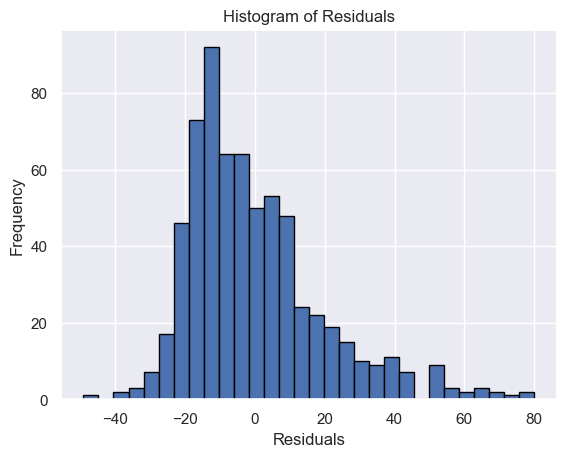

Average of Residuals: -0.11229135053110774
Average of Absolute Residuals: 14.96813353566009


In [11]:
import matplotlib.pyplot as plt

# ... (previous code)

# Calculate residuals
residuals = y_test - y_pred

# Plot histogram of residuals
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Calculate and print the average of residuals
average_residuals = residuals.mean()
print(f'Average of Residuals: {average_residuals}')


# Calculate absolute residuals
absolute_residuals = np.abs(residuals)

# Calculate and print the average of absolute residuals
average_absolute_residuals = absolute_residuals.mean()
print(f'Average of Absolute Residuals: {average_absolute_residuals}')


In [12]:
df_residuals.head()

,Actual,Predicted,Residuals
3100,16,29.0,-13.0
3163,48,28.0,20.0
3101,14,43.0,-29.0
1947,2,26.0,-24.0
2400,20,29.0,-9.0


In [13]:
# Assuming df_residuals_sorted is your sorted DataFrame with 'Residuals' column
zero_residuals = df_residuals[df_residuals['Residuals'] == 0]

# Display the rows where residuals are exactly 0
zero_residuals.head(50)

,Actual,Predicted,Residuals
1907,18,18.0,0.0
1213,28,28.0,0.0
2020,36,36.0,0.0
416,31,31.0,0.0
2536,28,28.0,0.0
2287,39,39.0,0.0
2609,18,18.0,0.0
2860,26,26.0,0.0
2752,44,44.0,0.0
2574,17,17.0,0.0


## ⬆︎⬆︎ GradientBoostingRegressor simple Mean Absolute Error: 14.97875569044006 & R-squared Score: 0.205676 ⬆︎⬆︎

## ⬇︎⬇︎ GradientBoostingRegressor with GridSearchCV  ⬇︎⬇︎

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Assuming df is your dataframe
selected_columns = [ 'simplified_color_encoded','intake_age', 
                    'simplified_condition_encoded', 'simplified_type_encoded', 
                     'days_in_shelter']
df_selected = df[selected_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Split the data into features (X) and target variable (y)
X = df_selected.drop('days_in_shelter', axis=1)
y = df_selected['days_in_shelter']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # # Use RandomOverSampler to handle imbalanced data
# ros = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
gb_model = grid_search.best_estimator_

# Now let's evaluate our model on the test set
y_pred = np.round(gb_model.predict(X_test))

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)  # Calculate RMSE
print(f'Root Mean Squared Error: {rmse}')

average_days_staying = y_test.mean()
print(f'Average Days Staying: {average_days_staying}')

if rmse < average_days_staying:
    print("RMSE is less than Average Days Staying.")
else:
    print("RMSE is greater than or equal to Average Days Staying.")
    
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared Score: %f" % r2)

In [ ]:
feature_importance = pd.Series(gb_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Add residuals to the DataFrame for further analysis if needed
df_residuals = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residuals': residuals})

# Display the DataFrame with residuals
# print(df_residuals)

df_residuals.head(50)

In [ ]:
import matplotlib.pyplot as plt

# ... (previous code)

# Calculate residuals
residuals = y_test - y_pred

# Plot histogram of residuals
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Calculate and print the average of residuals
average_residuals = residuals.mean()
print(f'Average of Residuals: {average_residuals}')


# Calculate absolute residuals
absolute_residuals = np.abs(residuals)

# Calculate and print the average of absolute residuals
average_absolute_residuals = absolute_residuals.mean()
print(f'Average of Absolute Residuals: {average_absolute_residuals}')


In [ ]:
#  df_residuals
zero_residuals = df_residuals[df_residuals['Residuals'] == 0]

# Display the rows where residuals are exactly 0
zero_residuals.head(50)

## ⬆︎⬆︎ GradientBoostingRegressor w GridSearchCV Mean Absolute Error: 15.35660091047041 & R-squared Score: 0.153738  ⬆︎⬆︎

## ⬇︎⬇︎ RandomForestRegressor no-sampling  ⬇︎⬇︎

In [ ]:
independent_variables = [ 'simplified_color_encoded', 'simplified_sex_encoded','intake_age', 
                    'simplified_condition_encoded', 'simplified_type_encoded', 
                    'simplified_breed_encoded', 'simplified_size_encoded']
dependent_variable = 'days_in_shelter'

In [ ]:

# Specify the column containing the values you want to check for uniqueness

X = df[independent_variables]
y = df[dependent_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
best_model = grid_search.best_estimator_

# Now let's evaluate our model on the test set
y_pred = np.round(best_model.predict(X_test)) # 80, 80.2 (80) 81

# Evaluate the regression model
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
print("Mean Squared Error: %f" % mse)

r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared Score: %f" % r2)

In [ ]:
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

## ⬆︎⬆︎ RandomForestRegressor w GridSearchCV (R2 : 0.175475 )  ⬆︎⬆︎

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(regression_forest_model.estimators_[0], feature_names=independent_variables, filled=True)
plt.title('Tree 1')
plt.show()

In [ ]:
y_pred

In [ ]:
print(y_test.tolist())

In [ ]:
# Create a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the DataFrame
print(comparison_df)

# # You can also save the DataFrame to a CSV file if you want to analyze it further
# comparison_df.to_csv('comparison_results.csv', index=False)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the entire DataFrame
print(comparison_df)
